In [60]:
#Import packages:
import os
import pandas as pd
from datetime import datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import auc, roc_curve, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.datasets import make_classification

#import data
importedData ='wineQuality.csv'
df = pd.read_csv(importedData)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [61]:
# split quality into hi/lo >=7
conditions = [df['quality'] >= 7, df['quality'] < 7,]
outputs = ['1', '0']
df['qualbin'] = pd.to_numeric(np.select(conditions, outputs))

In [62]:
#create 2 datasets and model them separately: red, white
white_wine = df.loc[df['type']  == 'white']
red_wine = df.loc[df['type']  == 'red']

In [63]:
#drop type and quality columns
white_wine = white_wine.drop(white_wine[['type', 'quality']], axis = 1)
white_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,qualbin
1599,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1600,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
1601,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
1602,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
1603,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [64]:
red_wine = red_wine.drop(red_wine[['type', 'quality']], axis = 1)
red_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,qualbin
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [65]:
# Split data into training and test - red:
red_X = red_wine.drop(red_wine[['qualbin']], axis = 1).values
red_y = red_wine['qualbin'].values
red_X_train, red_X_test, red_y_train, red_y_test = train_test_split(red_X, red_y, test_size = 0.3, random_state = 42)

In [66]:
# Split data into training and test - white:
white_X = white_wine.drop(white_wine[['qualbin']], axis = 1).values
white_y = white_wine['qualbin'].values
white_X_train, white_X_test, white_y_train, white_y_test = train_test_split(white_X, white_y, test_size = 0.3, random_state = 42)

In [67]:
# Feature Scaling:
scaler = RobustScaler()
red_X_train = scaler.fit_transform(red_X_train)
red_X_test = scaler.fit_transform(red_X_test)
white_X_train = scaler.fit_transform(white_X_train)
white_X_test = scaler.fit_transform(white_X_test)

In [68]:
#Apply Decision Tree model to the training data and score:
red_model = DecisionTreeClassifier()
red_model.fit(red_X_train, red_y_train)
red_model_score = red_model.score(red_X_test, red_y_test)
print('Decision Tree Classifier')
print('Red: ', red_model_score)
white_model = DecisionTreeClassifier()
white_model.fit(white_X_train, white_y_train)
white_model_score = white_model.score(white_X_test, white_y_test)
print('White: ', white_model_score)

Decision Tree Classifier
Red:  0.825
White:  0.7993197278911565


In [69]:
#Predict using the model and create confusion matrix again:
print('Red Confusion Matrix')
red_y_pred = red_model.predict(red_X_test)
print(confusion_matrix(red_y_test, red_y_pred))

white_y_pred = white_model.predict(white_X_test)
print('White Confusion Matrix')
print(confusion_matrix(white_y_test, white_y_pred))

Red Confusion Matrix
[[358  55]
 [ 29  38]]
White Confusion Matrix
[[990 151]
 [144 185]]


In [70]:
#Apply Random Forest model to the training data and score:
red_model = RandomForestClassifier()
red_model.fit(red_X_train, red_y_train)
red_model_score = red_model.score(red_X_test, red_y_test)
print('Random Forest Classifier')
print('Red: ', red_model_score)
white_model = RandomForestClassifier()
white_model.fit(white_X_train, white_y_train)
white_model_score = white_model.score(white_X_test, white_y_test)
print('White: ', white_model_score)

Random Forest Classifier
Red:  0.875
White:  0.8755102040816326


In [71]:
#Predict using the model and score again:
print('Red Confusion Matrix')
red_y_pred = red_model.predict(red_X_test)
print(confusion_matrix(red_y_test, red_y_pred))

white_y_pred = white_model.predict(white_X_test)
print('White Confusion Matrix')
print(confusion_matrix(white_y_test, white_y_pred))

Red Confusion Matrix
[[397  16]
 [ 44  23]]
White Confusion Matrix
[[1099   42]
 [ 141  188]]


In [72]:
#Apply  Gradient Boosting Classifier model to the training data and score:
red_model = GradientBoostingClassifier()
red_model.fit(red_X_train, red_y_train)
red_model_score = red_model.score(red_X_test, red_y_test)
print('Gradient Boosting Classifier')
print('Red: ', red_model_score)
white_model = GradientBoostingClassifier()
white_model.fit(white_X_train, white_y_train)
white_model_score = white_model.score(white_X_test, white_y_test)
print('White: ', white_model_score)

Gradient Boosting Classifier
Red:  0.8520833333333333
White:  0.8333333333333334


In [73]:
#Predict using the model and score again:
print('Red Confusion Matrix')
red_y_pred = red_model.predict(red_X_test)
print(confusion_matrix(red_y_test, red_y_pred))

white_y_pred = white_model.predict(white_X_test)
print('White Confusion Matrix')
print(confusion_matrix(white_y_test, white_y_pred))

Red Confusion Matrix
[[390  23]
 [ 48  19]]
White Confusion Matrix
[[1079   62]
 [ 183  146]]


In [74]:
#Apply Logistic Regression model to the training data and score:
red_model = LogisticRegression()
red_model.fit(red_X_train, red_y_train)
red_model_score = red_model.score(red_X_test, red_y_test)
print('Logistic Regression')
print('Red: ', red_model_score)
white_model = LogisticRegression()
white_model.fit(white_X_train, white_y_train)
white_model_score = white_model.score(white_X_test, white_y_test)
print('White: ', white_model_score)

Logistic Regression
Red:  0.8791666666666667
White:  0.7938775510204081


In [75]:
#Predict using the model and score again:
print('Red Confusion Matrix')
red_y_pred = red_model.predict(red_X_test)
print(confusion_matrix(red_y_test, red_y_pred))

white_y_pred = white_model.predict(white_X_test)
print('White Confusion Matrix')
print(confusion_matrix(white_y_test, white_y_pred))

Red Confusion Matrix
[[404   9]
 [ 49  18]]
White Confusion Matrix
[[1074   67]
 [ 236   93]]


In [76]:
#Apply KNeighborsClassifier model to the training data and score:
red_model = KNeighborsClassifier()
red_model.fit(red_X_train, red_y_train)
red_model_score = red_model.score(red_X_test, red_y_test)
print('KNeighbors Classifier')
print('Red: ', red_model_score)
white_model = KNeighborsClassifier()
white_model.fit(white_X_train, white_y_train)
white_model_score = white_model.score(white_X_test, white_y_test)
print('White: ', white_model_score)

KNeighbors Classifier
Red:  0.8708333333333333
White:  0.8387755102040816


In [77]:
#Predict using the model and score again:
print('Red Confusion Matrix')
red_y_pred = red_model.predict(red_X_test)
print(confusion_matrix(red_y_test, red_y_pred))

white_y_pred = white_model.predict(white_X_test)
print('White Confusion Matrix')
print(confusion_matrix(white_y_test, white_y_pred))

Red Confusion Matrix
[[392  21]
 [ 41  26]]
White Confusion Matrix
[[1051   90]
 [ 147  182]]


In [78]:
#Apply GaussianNB model to the training data and score:
red_model = GaussianNB()
red_model.fit(red_X_train, red_y_train)
red_model_score = red_model.score(red_X_test, red_y_test)
print('GaussianNB Classifier')
print('Red: ', red_model_score)
white_model = GaussianNB()
white_model.fit(white_X_train, white_y_train)
white_model_score = white_model.score(white_X_test, white_y_test)
print('White: ', white_model_score)

GaussianNB Classifier
Red:  0.84375
White:  0.7034013605442176


In [79]:
#Predict using the model and score again:
print('Red Confusion Matrix')
red_y_pred = red_model.predict(red_X_test)
print(confusion_matrix(red_y_test, red_y_pred))

white_y_pred = white_model.predict(white_X_test)
print('White Confusion Matrix')
print(confusion_matrix(white_y_test, white_y_pred))

Red Confusion Matrix
[[362  51]
 [ 24  43]]
White Confusion Matrix
[[808 333]
 [103 226]]


In [80]:
#Apply SVC model to the training data and score:
red_model = SVC()
red_model.fit(red_X_train, red_y_train)
red_model_score = red_model.score(red_X_test, red_y_test)
print('SVC Classifier')
print('Red: ', red_model_score)
white_model = SVC()
white_model.fit(white_X_train, white_y_train)
white_model_score = white_model.score(white_X_test, white_y_test)
print('White: ', white_model_score)

SVC Classifier
Red:  0.88125
White:  0.8251700680272109


In [81]:
#Predict using the model and score again:
print('Red Confusion Matrix')
red_y_pred = red_model.predict(red_X_test)
print(confusion_matrix(red_y_test, red_y_pred))

white_y_pred = white_model.predict(white_X_test)
print('White Confusion Matrix')
print(confusion_matrix(white_y_test, white_y_pred))

Red Confusion Matrix
[[411   2]
 [ 55  12]]
White Confusion Matrix
[[1103   38]
 [ 219  110]]


I applied different ML models above and evaluated their performance for both red and white wine test data and tabulated the scores and put them in a confusion matrix. The Random Forest and SVC models appear to be the best for red wines and Random Forest is the best for white. Since Random Forest is high for both, I will perform a gridsearch hyperparameter tuning for that model as well determine the ROC_AUC scores and ROC curve. To be followed by Feature Importance. 

In [82]:
#build param grid features
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2, 4]
min_sample_split = [2, 5]
min_sample_leaf = [1, 2]
bootstrap = [True, False]

In [83]:
param_grid = {'n_estimators' : n_estimators, 
              'max_features' : max_features, 
              'max_depth' : max_depth, 
              'min_samples_split' : min_sample_split, 
              'min_samples_leaf' : min_sample_leaf, 
              'bootstrap' : bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [87]:
#GridSearchCV
rf = RandomForestClassifier()
gs = GridSearchCV(estimator = rf, param_grid = param_grid, scoring = 'roc_auc', cv = 3, n_jobs = 4)
red_gs = gs.fit(red_X_train, red_y_train)
white_gs = gs.fit(white_X_train, white_y_train)

print('Red:')
print(red_gs.best_estimator_)
print(red_gs.best_score_)

print('White:')
print(white_gs.best_estimator_)
print(white_gs.best_score_)


Red:
RandomForestClassifier(max_depth=4, min_samples_leaf=2, n_estimators=72)
0.8280810805172524
White:
RandomForestClassifier(max_depth=4, min_samples_leaf=2, n_estimators=72)
0.8280810805172524


In [88]:
#Fitting the Random forest model with the optimal hyperparameters
rf = RandomForestClassifier(n_estimators = 48, max_features = 'sqrt' , max_depth = 4, min_samples_split = 5, bootstrap = False)
rf.fit(red_X_train, red_y_train)
red_y_pred = rf.predict(red_X_test)
red_acc = accuracy_score(red_y_test, red_y_pred)
red_cv = cross_val_score(rf, red_X_test, red_y_test, scoring = 'roc_auc').mean()
print('Red:')
print(red_acc)
print(red_cv)

print('White:')
rf.fit(white_X_train, white_y_train)
white_y_pred = rf.predict(white_X_test)
white_acc = accuracy_score(white_y_test, white_y_pred)
white_cv = cross_val_score(rf, white_X_test, white_y_test, scoring = 'roc_auc').mean()
print(white_acc)
print(white_cv)

Red:
0.8666666666666667
0.8676174545407577
White:
0.7993197278911565
0.8254003121039435


Feature: 0, Score: 0.02320
Feature: 1, Score: 0.06012
Feature: 2, Score: 0.03225
Feature: 3, Score: 0.04622
Feature: 4, Score: 0.11633
Feature: 5, Score: 0.02718
Feature: 6, Score: 0.04506
Feature: 7, Score: 0.19901
Feature: 8, Score: 0.04355
Feature: 9, Score: 0.02057
Feature: 10, Score: 0.38652


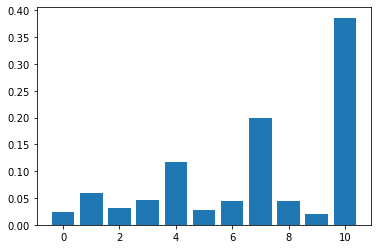

In [89]:
# summarize feature importance
importance = rf.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [90]:
#ROC-AUC Score
red_y_scores_rf = rf.predict_proba(red_X_test)
red_y_scores_rf = red_y_scores_rf[:,1]
red_auroc = roc_auc_score(red_y_test, red_y_scores_rf)
print("Red ROC-AUC Score:", red_auroc)

white_y_scores_rf = rf.predict_proba(white_X_test)
white_y_scores_rf = white_y_scores_rf[:,1]
white_auroc = roc_auc_score(white_y_test, white_y_scores_rf)
print("White ROC-AUC Score:", white_auroc)

Red ROC-AUC Score: 0.7865996892053052
White ROC-AUC Score: 0.8248550170623006


White wine


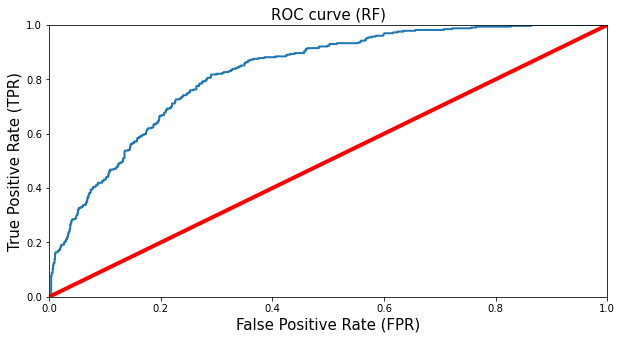

In [100]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(white_y_test, white_y_scores_rf)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (RF)',fontsize=15)

print('White wine')
plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("white_roc_curve_RF.jpg")
plt.show()

Red wine


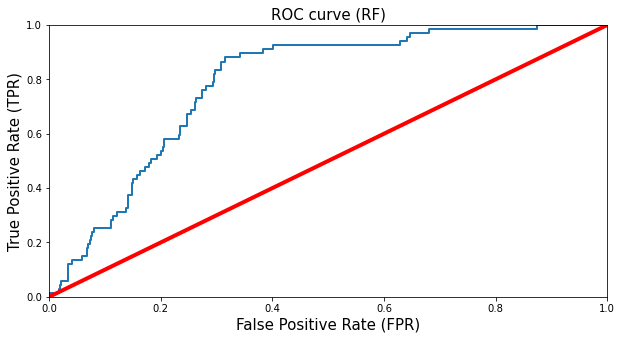

In [101]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(red_y_test, red_y_scores_rf)
print('Red wine')
plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("red_roc_curve_RF.jpg")
plt.show()